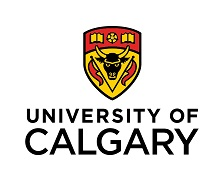

In [101]:
from IPython.display import Image
Image("../Images/Logo.jpg")

# <center>Graduate Project ENEL 698</center>
<center><a href = "https://github.com/isohels/Graduate-Project">Github Link</a></center>

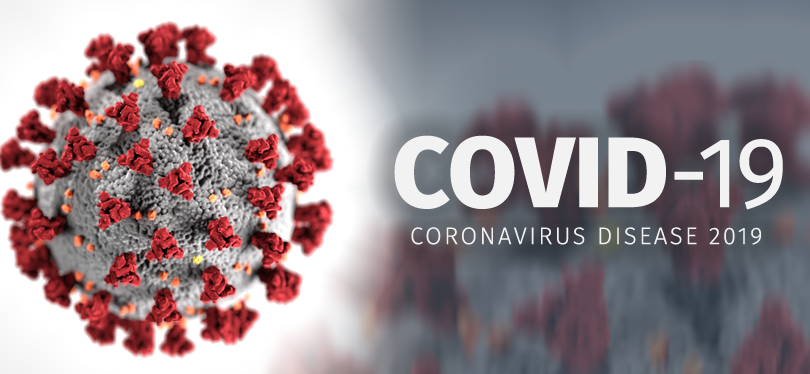

In [102]:
Image("../Images/Covid-19.png")

# Context

### Novel Coronavirus 2019 (nCoV-2019) is a virus which affects respiratory system and was first discovered in wuhan, China. Some early reports suggested that virus may have been transmitted from animal to person. As we know whole world has been shutdown  because of the widespread cases. At this time it's unclear how easily or sustainably this virus is spreading between people.

# Current Cases (WorldWide)
### To know how bad the world has been affected lets get some information on current situation.

#### Lets import all the dependencies for scrapping the website

In [103]:
import bs4
from urllib.request import Request, urlopen
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as soup
import pandas as pd

#### Dataset used

In [199]:
pd.read_excel('../covid_data/Data/meta/covid_data.xlsx')

Data Used  \
0              nCoV2019.live   
1  Confirmed cases dataframe   

                                                Info  \
0  This data has been scraped from nCoV2019.live....   
1  This data is a time series representation of c...   

                                                Link  
0                             https://ncov2019.live/  
1  https://raw.githubusercontent.com/CSSEGISandDa...

In [104]:
# grabbing the url

url = "https://ncov2019.live/"
req = Request(url, headers={"User-Agent" : "Mozilla/5.0"})

webpage = urlopen(req).read()

#parsing it as lxml
pagesoup = soup(webpage,"lxml")

#### Website Information
1. Website Name
2. Link to Website

In [105]:
from IPython.display import display, Markdown

In [106]:
#finding the relevant tags to scrap the data from website

website_name = pagesoup.find('a',class_ = "navbar-brand")
link = "https://ncov2019.live/"
Markdown('<strong>{}</strong>{}'.format(website_name.text,link))

<strong>





    nCoV2019.live
  </strong>https://ncov2019.live/

In [107]:
#some quick facts from the website

quickfacts = pagesoup.find('div', class_ = "container--wrap bg-navy-4")
Markdown('<strong align="center">{}</strong>'.format(quickfacts))

<strong align="center"><div class="container--wrap bg-navy-4">
<p style="color: #DFDFEF; font-size: 30px; text-align: center; padding-top: 15px; font-weight: bolder; margin-bottom: 0;">
    Quick Facts
  </p>
<p style="color: #DFDFEF; font-size: 12px; text-align: center; font-weight: bolder; margin-bottom: 0;">
    updated: <i class="last_updated">A few minutes ago</i>
</p>
<table>
<tr>
<p style="color: rgb(101, 221, 155); font-weight: bold; text-align: center; border-bottom: 0; font-size: 50px; margin-bottom: 0px;">
        43,725,289
      </p>
<p style="color: #DFDFEF; font-size: 18px; font-weight: bold; border-bottom: 0; text-align: center;">
        Total Confirmed
      </p>
</tr>
<tr>
<p style="color: #ff9d00; font-weight: bold; text-align: center; border-bottom: 0; font-size: 50px; margin-bottom: 0px;"> 
          78,678
      </p>
<p style="color: #DFDFEF; font-size: 18px; font-weight: bold; border-bottom: 0; text-align: center;">
        Total Critical
      </p>
</tr>
<tr>
<p style="color: #F65164; font-weight: bold; text-align: center; border-bottom: 0; font-size: 50px; margin-bottom: 0px;">
        1,163,424
      </p>
<p style="color: #DFDFEF; font-size: 18px; font-weight: bold; border-bottom: 0; text-align: center;">
        Total Deceased
      </p>
</tr>
<tr>
<p style="color: rgb(248, 245, 64); font-weight: bold; text-align: center; border-bottom: 0; font-size: 50px; margin-bottom: 0px;">
        10,727,114
      </p>
<p style="color: #DFDFEF; font-size: 18px; font-weight: bold; border-bottom: 0; text-align: center;">
        Total Active
      </p>
</tr>
<tr>
<p style="color: rgb(68, 155, 226); font-weight: bold; text-align: center; border-bottom: 0; font-size: 50px; margin-bottom: 0px;">
        31,628,328
      </p>
<p style="color: #DFDFEF; font-size: 18px; font-weight: bold; border-bottom: 0; text-align: center;">
        Total Recovered
      </p>
</tr>
<tr>
<p style="color: rgb(62, 206, 229); font-weight: bold; text-align: center; border-bottom: 0; font-size: 50px; margin-bottom: 0px;">
        179<!--  / 56 -->
</p>
<p style="color: #DFDFEF; font-size: 18px; font-weight: bold; border-bottom: 0; text-align: center;">
        Total Vaccines In Development
      </p>
</tr>
</table>
</div></strong>

## World COVID-19 Stats

#### We will scrap worldwide covid cases.
1. We'll use pandas read.html which lets us read the webpage table without much of complexity.
2. Convert the table into dataframe for further processing.
3. In the header of the list generated you see a number "1", which was used in the original website as a filter for arranging data in ascending or descending order.

In [108]:
import pandas as pd
import requests

In [109]:
# grabbing latest worldwide data

url = "https://ncov2019.live/data/world"

r = requests.get(url)
df_list = pd.read_html(r.text)            #this parse all html tables from a webpage to alist
world_df = df_list[2]
world_df

Name  Confirmed Per Million  Changes Today  \
0                   TOTAL   43725289        5618         366733   
1          ★  Afghanistan      40937        1044            104   
2              ★  Albania      19445        6759            288   
3              ★  Algeria      56419        1279            276   
4              ★  Andorra       4325           0            287   
..                    ...        ...         ...            ...   
212         ★  Montserrat         13           0              0   
213   ★  Falkland Islands         13           0              0   
214           ★  Anguilla          3           0              0   
215  ★  Wallis and Futuna          1           0              0   
216              ★  China      85810          60             20   

    Percentage Day Change Critical Deceased Per Million.1  Changes Today.1  \
0                   0.85%    78678  1163424           149             4298   
1                   0.25%       93     1518            39                4   
2                    1.5%       20      480           167                3   
3                   0.49%       29     1922            44                8   
4                   7.11%       22       72             0                3   
..                    ...      ...      ...           ...              ...   
212                    0%  Unknown        1             0                0   
213                    0%  Unknown  Unknown       Unknown                0   
214                    0%  Unknown  Unknown       Unknown                0   
215                    0%  Unknown  Unknown       Unknown                0   
216                 0.02%        4     4634             3                0   

    Percentage Death Change      Tests    Active Recovered Per Million.2  \
0                     0.37%  786703599  10727114  31628328          4064   
1                     0.26%     120425      5269     34150           871   
2                     0.63%     113930      8260     10705          3721   
3                     0.42%    Unknown   Unknown     39273           891   
4                     4.35%     137457      1296      2957             0   
..                      ...        ...       ...       ...           ...   
212                      0%        483         0        12             0   
213                      0%       2682   Unknown        13             0   
214                      0%       1329   Unknown         3             0   
215                      0%         48   Unknown         1             0   
216                      0%  160000000       265     80911            56   

     Population  
0    7782884635  
1      39201544  
2       2876786  
3      44099384  
4         77305  
..          ...  
212        4993  
213        3511  
214       15046  
215       11174  
216  1439323776  

[217 rows x 15 columns]

#### Sorting the data on number of confirmed cases

In [110]:
# We will now sort the countries based on total confirmed cases column

world_df = world_df.sort_values("Confirmed" , ascending = False)



#Lets get top 10 affected countries

# world_df.head(10)


#### Lets see many coulmns are missing values.

In [111]:
world_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217 entries, 0 to 215
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Name                     217 non-null    object
 1   Confirmed                217 non-null    int64 
 2   Per Million              217 non-null    object
 3   Changes Today            217 non-null    int64 
 4   Percentage Day Change    217 non-null    object
 5   Critical                 217 non-null    object
 6   Deceased                 217 non-null    object
 7   Per Million.1            217 non-null    object
 8   Changes Today.1          217 non-null    int64 
 9   Percentage Death Change  217 non-null    object
 10  Tests                    217 non-null    object
 11  Active                   217 non-null    object
 12  Recovered                217 non-null    object
 13  Per Million.2            217 non-null    object
 14  Population               217 non-null    o

#### Lets import seaborn as well as matplotlib

In [112]:
#We can also visualize the same using seaborn

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

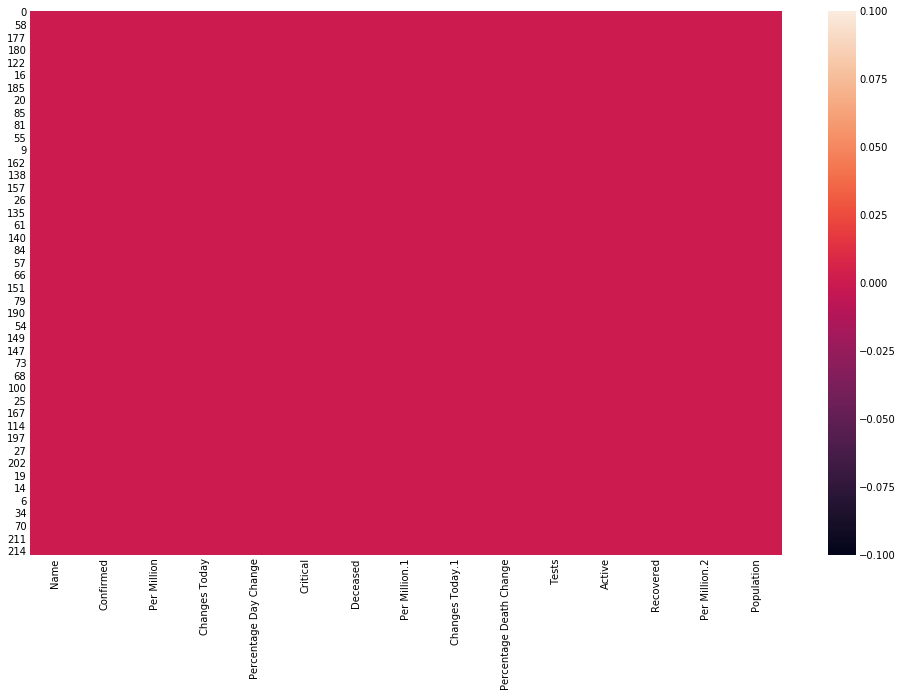

In [113]:
plt.figure(figsize=(15,10))
sns.heatmap(world_df.isnull())

#### We'll use plotly express for visualization.
1. It generates graphs which are interactive and user friendly.
2. We can use zoom in and zoom out feature for proper understanding to a specific part of graph.

In [114]:
import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

#### Plot number of confirmed cases.

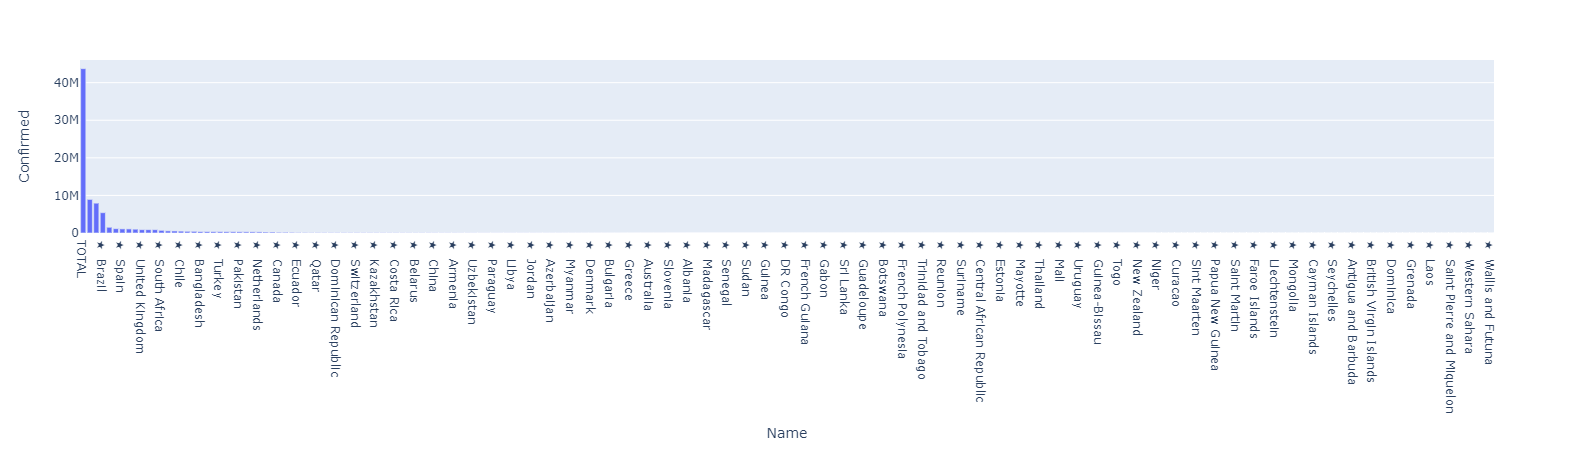

In [115]:
# plotting world_df based on confirmed cases by country names.

world_fig = px.bar(world_df, x = 'Name' , y = 'Confirmed')
world_fig.show()

 - We can zoom in the graph, thats the beauty of plotly.

In [116]:
# Lets plot top 20 countries based on confirmed cases.

world_fig = px.bar(world_df.head(20), x = "Name" , y = 'Confirmed')
world_fig.show()

 - Now we can see United states holds number 1 position. (cough cough "we don't wear masks" - americans)
 - Brazil and India comes at the second and third position surpassing Russia respectively.

#### Now we'll try to explore the world_df in more details.(based on number of Deceased People)

In [117]:
# Lets see how many people have died with respect to countries. (For top 20 countries)

world_fig = px.bar(world_df.head(20), x = 'Name', y = 'Confirmed', color = "Deceased")
world_fig.show()

 - Here the color of each bar corrosponds to how many people have died.
 - We cannot make out which country has most number of deceased people in a descending order.

In [118]:
# lets grab the world_df based on deceased column.
world_df.sort_values('Deceased',ascending = False)

Name  Confirmed Per Million  Changes Today  \
215  ★  Wallis and Futuna          1           0              0   
209      ★  New Caledonia         27           0              0   
200          ★  Gibraltar        670           0              3   
202      ★  Faroe Islands        490           0              0   
52             ★  Eritrea        461         129              0   
..                    ...        ...         ...            ...   
196            ★  Curacao        873           0             15   
166     ★  Western Sahara         10           0              0   
27             ★  Burundi        557          46              0   
204     ★  Cayman Islands        239           0              0   
93       ★  Liechtenstein        402           0             37   

    Percentage Day Change Critical Deceased Per Million.1  Changes Today.1  \
215                    0%  Unknown  Unknown       Unknown                0   
209                    0%  Unknown  Unknown       Unknown                0   
200                 0.45%       21  Unknown       Unknown                0   
202                    0%  Unknown  Unknown       Unknown                0   
52                     0%  Unknown  Unknown       Unknown                0   
..                    ...      ...      ...           ...              ...   
196                 1.75%        4        1             0                0   
166                    0%  Unknown        1             0                0   
27                     0%  Unknown        1             0                0   
204                    0%        1        1             0                0   
93                 10.14%        8        1             0                0   

    Percentage Death Change    Tests   Active Recovered Per Million.2  \
215                      0%       48  Unknown         1             0   
209                      0%    15180  Unknown        27             0   
200                      0%    62269  Unknown       532             0   
202                      0%   150952  Unknown       478             0   
52                       0%  Unknown  Unknown       405           114   
..                      ...      ...      ...       ...           ...   
196                      0%    11761      282       590             0   
166                      0%  Unknown  Unknown         8             0   
27                       0%    49642       45       511            43   
204                      0%    45365       23       215             0   
93                       0%     9155      191       210             0   

    Population  
215      11174  
209     286369  
200      33688  
202      48922  
52     3561906  
..         ...  
196     164307  
166     601902  
27    11999960  
204      65966  
93       38163  

[217 rows x 15 columns]

 - The column contains many unknown values.
 - We'll replace all the unknown values with zero.
 - Then we will arrange the column in descending order for visualization purpose.

In [119]:
# lets replace unknown values to 0.

world_df['Deceased'].replace("Unknown", 0,inplace=True)
world_df['Deceased'] = pd.to_numeric(world_df['Deceased'])          #convert column from type object to int64
world_df['Deceased']

0      1163424
170     230906
171     119534
172     157397
173      26269
        ...   
213          0
166          1
141          0
214          0
215          0
Name: Deceased, Length: 217, dtype: int64

In [120]:
# now again lets grab world_df based on deceased column.

world_df.sort_values('Deceased',ascending = False)

Name  Confirmed Per Million  Changes Today  \
0                   TOTAL   43725289        5618         366733   
170      ★  United States    8946413       26978          54080   
172             ★  Brazil    5409854       25394          15726   
171              ★  India    7945777        5740          36727   
177             ★  Mexico     891160        6889           4360   
..                    ...        ...         ...            ...   
19              ★  Bhutan        342           0              2   
200          ★  Gibraltar        670           0              3   
52             ★  Eritrea        461         129              0   
202      ★  Faroe Islands        490           0              0   
215  ★  Wallis and Futuna          1           0              0   

    Percentage Day Change Critical  Deceased Per Million.1  Changes Today.1  \
0                   0.85%    78678   1163424           149             4298   
170                 0.61%    16471    230906           696              390   
172                 0.29%     8318    157397           739              234   
171                 0.46%     8944    119534            86              504   
177                 0.49%     2781     88924           687              181   
..                    ...      ...       ...           ...              ...   
19                  0.59%  Unknown         0       Unknown                0   
200                 0.45%       21         0       Unknown                0   
52                     0%  Unknown         0       Unknown                0   
202                    0%  Unknown         0       Unknown                0   
215                    0%  Unknown         0       Unknown                0   

    Percentage Death Change      Tests    Active Recovered Per Million.2  \
0                     0.37%  786703599  10727114  31628328          4064   
170                   0.17%  134285329   2913206   5802301         17497   
172                   0.15%   21900000    386527   4865930         22840   
171                   0.42%  103462778    627583   7198660          5200   
177                    0.2%    2295678    151881    650355          5027   
..                      ...        ...       ...       ...           ...   
19                       0%     166087   Unknown       307             0   
200                      0%      62269   Unknown       532             0   
52                       0%    Unknown   Unknown       405           114   
202                      0%     150952   Unknown       478             0   
215                      0%         48   Unknown         1             0   

     Population  
0    7782884635  
170   331621597  
172   213040452  
171  1384308221  
177   129362066  
..          ...  
19       774299  
200       33688  
52      3561906  
202       48922  
215       11174  

[217 rows x 15 columns]

 - Perfecto!. Now we can see that column has been cleared off all the "Unknown".

In [121]:
# lets again try ro visualize world_df based on death poll for top 20 countries.

world_fig = px.bar(world_df.sort_values('Deceased', ascending=False).head(20), x = 'Name' , y = 'Deceased')
world_fig.show()


#### Click on the link for more information.

 - United States tops the chart. <a href = "https://www.sciencemag.org/news/2020/04/united-states-leads-coronavirus-cases-not-pandemic-response" > If you want to know why United States leads in coronvirus cases, but not pandemic response</a>
 - Brazil also surpasses 100,000 deaths and becomes the one of the worst affected countries. <a href = "https://www.ctvnews.ca/health/coronavirus/death-became-normal-brazil-surpasses-100-000-deaths-from-covid-19-1.5056757" >'Death became normal': Brazil surpasses 100,000 deaths from COVID-19</a>
 - Mexico's death toll also reached 59.106k and many young people are dying of COVID-19 <a href = "https://www.forbes.com/sites/nathanielparishflannery/2020/07/24/why-are-so-many-young-people-dying-of-covid-19-in-mexico-city/#148bc1f22792">Why Are So Many Young People Dying Of Covid-19 In Mexico City?</a>
 - India has also reached 56k and there are many questions about India's rising COVID-19 infection <a href ="https://www.bbc.com/news/world-asia-india-53018351">Five key questions about India's rising Covid-19 infections</a>

#### Lets visualize the death toll in relation to total confirmed case

In [122]:
# lets visualize the death toll based on total confirmed case

import plotly.graph_objects as go


# for grouped barplot using Deceased numbers per country and total number of cases per country.

fig = go.Figure(data = [
go.Bar(
    x = world_df['Name'],
    y = world_df["Deceased"].head(20),
    name = "Deceased",
    marker_color = "indianred"
),
go.Bar(
    x = world_df['Name'],
    y = world_df['Confirmed'].head(20),
    name = 'Confirmed',
    marker_color = "lightsalmon"
)
])

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group')
fig.show()

 - Here we can see the Death toll is very low as compared to confirmed cases, which is because most of the people recover from COVID-19. Early estimates predicted that the overall COVID-19 recovery rate is between 97% and 99.75%.
 - Mortality rate calculated  = 3.4% (802.318k/23.09665M)

#### lets visualize the recovered cases based on total confirmed case

In [123]:
# lets visualize the recovered case based in relation to total confirmed case

import plotly.graph_objects as go


# for grouped barplot using recovered cases per country and total number of cases per country.

fig = go.Figure(data = [
go.Bar(
    x = world_df['Name'],
    y = world_df["Recovered"].head(20),
    name = "Recovered",
    marker_color = "indianred"
),
go.Bar(
    x = world_df['Name'],
    y = world_df['Confirmed'].head(20),
    name = 'Confirmed',
    marker_color = "lightsalmon"
)
])

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group')
fig.show()

 - Here we can see how many person recovered in relation to total cases registered.
 - Recovery rate  = 67% (15.4827M/23.09665M), this contradicts early predicted value of recovery rate which was 97%.
 - Recovery rate and mortality rate are based on how well a country is implementing the testing of its people. <a href = "https://www.who.int/news-room/commentaries/detail/estimating-mortality-from-covid-19">Estimating mortality from COVID-19</a>

#### Lets see who has implemented testing vastly.

In [124]:
# replace unknown values from the column

world_df['Tests'].replace("Unknown", 0, inplace=True)
world_df['Tests'] = pd.to_numeric(world_df['Tests'])          #convert column from type object to int64



#Now lets plot the data

world_fig = px.bar(world_df.sort_values('Tests', ascending=False).head(20), x = 'Name' , y = 'Tests')
world_fig.show()

 - China on first position that was unexpected. I was expecting United States.
 - As you can see the countries who are vastly testing their people have a upper hand on curbing the spread of virus by implementing policies.

#### lets explore the Confirmed cases in relation to total population

In [125]:
# lets visualize the confirmed case based in relation to total population

import plotly.graph_objects as go


# for grouped barplot using confirmed cases per country and population per country.

fig = go.Figure(data = [
go.Bar(
    x = world_df['Name'],
    y = world_df["Confirmed"].head(20),
    name = "Confirmed",
    marker_color = "indianred"
),
go.Bar(
    x = world_df['Name'],
    y = world_df['Population'].head(20),
    name = 'Population',
    marker_color = "lightsalmon"
)
])

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group')
fig.show()

 - This graph shows a small percentage of people are affected by the novel coronavirus. <a href = "https://www.canada.ca/en/public-health/services/publications/diseases-conditions/people-high-risk-for-severe-illness-covid-19.html">
    People who are at high risk for severe illness from COVID-19</a>

In [126]:
#Mortality calculation

world_df['mortality'] = world_df[['Confirmed','Deceased']].apply(lambda x: (x['Deceased']*100/x['Confirmed']),axis=1 )

#Recovery calculation

world_df['Recovered'] = pd.to_numeric(world_df['Recovered'],errors='coerce')
world_df['recovery'] = world_df[['Confirmed','Recovered']].apply(lambda x: (x['Recovered']*100/x['Confirmed']),axis=1 )

In [127]:
def recovery_mortality_plot():
    
    name = ['recovery','mortality']
    Value=[True,False]
    
    for i,j in zip(name,Value):
        
        world_fig = px.bar(world_df.sort_values(i, ascending=j).head(50), x = 'Name' , y = i)
        world_fig.show()
        
recovery_mortality_plot()

 - **Martinique, Belgium, France** has lowest recovery rate among countries.
 - Yemen has highest mortality rate **~30%**, which is one of the highest in the world and five times the global average. <a href = "https://www.bmj.com/content/370/bmj.m2997">Covid-19: Deaths in Yemen are five times global average as healthcare collapses</a>

#### Lets plot world data using Choropleth Map

In [128]:
#something worng with the country names. plotly uses standard ISO-3_codes. Lets try to create a column for country codes

print("{} countries in the list.". format(world_df['Name'].nunique()))

217 countries in the list.


#### The country converter (coco) - a Python package for converting country names between different classifications schemes.
<a href = "https://pypi.org/project/country-converter/">For more info please click here</a>.

In [129]:
import country_converter as coco

In [130]:
# Creating a list and appending all the names from world_df column.

Names = []
for i in range(1,215):
    Names.append(world_df.iloc[i]['Name'][3:])

# Insert Total at index 0. we left that because it doesn't contain any start in it.

Names.insert(0,'TOTAL')

In [131]:
standard_names = coco.convert(names= Names, to='ISO3')

In [132]:
map_data = world_df[world_df['Name']!='TOTAL']
print(map_data.nunique())
print(len(map_data))

Name                       216
Confirmed                  213
Per Million                158
Changes Today              119
Percentage Day Change      108
Critical                    94
Deceased                   170
Per Million.1              104
Changes Today.1             45
Percentage Death Change     75
Tests                      198
Active                     167
Recovered                  207
Per Million.2              153
Population                 216
mortality                  193
recovery                   207
dtype: int64
216


In [133]:
# Adding the ISO3 code in a new world_df['Code'] column.

map_data = map_data[:215]
map_data['code'] = standard_names

map_data['code'] = map_data['code'].shift(-1)

# Removing countries of which ISO3 code is not available

choropleth_data = map_data[map_data['code'] != "NaN"]
# choropleth_data

In [134]:
#lets again try to plot the data using choropleth dataframe.

# For using choropleth first we have to make a dictionary

data = dict(
        type = 'choropleth',
        locations = choropleth_data['code'],
        z = choropleth_data['Confirmed'],
        text = choropleth_data['Deceased'],
        marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),
        colorbar = {'title' : "Confirmed Cases"}
        )

In [135]:
# Now create a layout for the graph

layout = dict(
    
    title = 'World COVID-19 Stats',
    width=1080,
    height=900,
    geo = dict(
        showframe = False,
        projection = {'type':'mercator'}
    )
    )

In [136]:
# Finally we will pass both layout and data dictionary to generate the map.
choromap = go.Figure(data = [data],layout = layout)
choromap.show()

## Canada COVID-19 Stats

#### Lets get Latest Canada's information.
1. We'll use the pandas read.html which lets us read the webpage table without much of complexity.
2. We can also use the lsit to convert it to a dataframe.
3. In the header of the list generated you see a number "1", which was used in the original website as a filter for arranging data in ascending or descending order.

In [137]:
#grabbing latest canada specific data

url = "https://ncov2019.live/data/canada"

r = requests.get(url)
df_list = pd.read_html(r.text) # this parses all the tables in webpages to a list
canada_df = df_list[2]
canada_df

Name  Confirmed Per Million  Changes Today  \
0                          TOTAL     218861     Unknown              0   
1                     ★  Alberta      24261     Unknown              0   
2            ★  British Columbia      12554     Unknown              0   
3                    ★  Manitoba       4249     Unknown              0   
4               ★  New Brunswick        328     Unknown              0   
5   ★  Newfoundland and Labrador        290     Unknown              0   
6       ★  Northwest Territories          9     Unknown              0   
7                 ★  Nova Scotia       1100     Unknown              0   
8                     ★  Ontario      73143     Unknown              0   
9        ★  Prince Edward Island         64     Unknown              0   
10                     ★  Quebec     100114     Unknown              0   
11               ★  Saskatchewan       2729     Unknown              0   
12                      ★  Yukon         20     Unknown              0   

   Percentage Day Change Critical Deceased Per Million.1  Changes Today.1  \
0                     0%      215     9994       Unknown                0   
1                     0%  Unknown      300       Unknown                0   
2                     0%  Unknown      256       Unknown                0   
3                     0%  Unknown       54       Unknown                0   
4                     0%  Unknown        6       Unknown                0   
5                     0%  Unknown        4       Unknown                0   
6                     0%  Unknown  Unknown       Unknown                0   
7                     0%  Unknown       65       Unknown                0   
8                     0%  Unknown     3141       Unknown                0   
9                     0%  Unknown  Unknown       Unknown                0   
10                    0%  Unknown     6143       Unknown                0   
11                    0%  Unknown       25       Unknown                0   
12                    0%  Unknown  Unknown       Unknown                0   

   Percentage Death Change    Tests   Active  Recovered Per Million.2  \
0                       0%  9603477    24685     184181       Unknown   
1                       0%  Unknown  Unknown      20310       Unknown   
2                       0%  Unknown  Unknown      10289       Unknown   
3                       0%  Unknown  Unknown       2142       Unknown   
4                       0%  Unknown  Unknown        257       Unknown   
5                       0%  Unknown  Unknown        276       Unknown   
6                       0%  Unknown  Unknown          5       Unknown   
7                       0%  Unknown  Unknown       1029       Unknown   
8                       0%  Unknown  Unknown      62882       Unknown   
9                       0%  Unknown  Unknown         63       Unknown   
10                      0%  Unknown  Unknown      84828       Unknown   
11                      0%  Unknown  Unknown       2085       Unknown   
12                      0%  Unknown  Unknown         15       Unknown   

   Population  
0     Unknown  
1     Unknown  
2     Unknown  
3     Unknown  
4     Unknown  
5     Unknown  
6     Unknown  
7     Unknown  
8     Unknown  
9     Unknown  
10    Unknown  
11    Unknown  
12    Unknown

## Canada COVID-19 Stats

#### Lets visualize Canada's Data and see which province has been worst effected.
1. We'll use the same above canada_df for visualization purpose.
2. We are going to use this dataframe because it's the latest data and our script we'll update the data every time we run the cell based on the website mentioned above.
3. I'm going to use plotly for visualization purpose as it generates graphs which are interactive and user friendly.

In [138]:
canada_fig = px.bar(canada_df.sort_values('Confirmed'),x='Name',y='Confirmed',color="Deceased")
canada_fig.show()

 - Quebec has maximum number of confirmed cases and twice as many deceased people than ontario. <a href = "https://www.ctvnews.ca/health/coronavirus/quebec-leads-canada-in-coronavirus-deaths-so-why-is-it-starting-to-reopen-1.4928940"> Quebec leads Canada in Coronavirus deaths</a>
 - In this article I also found one more interesting thing that Alberta has done more testing per capita, and along with good policies the death polls remains below 500.
 - There a some provinces where there were less to no cases, and no death has been reported, because quite a few people live there.

#### Lets see relation between total confirmed cases to recovered cases.

In [139]:
canada_fig = px.bar(canada_df.sort_values('Recovered'), x = 'Name', y = 'Recovered',color='Confirmed')
canada_fig.show()

#### Lets calculate recovery rate in Canada and Alberta specifically

In [140]:
fig = go.Figure(data = [
    go.Bar(
    x = canada_df['Name'],
    y = canada_df['Recovered'],
    name = "Recovered"
    ),
    
    go.Bar(
    x = canada_df['Name'],
    y = canada_df['Confirmed'],
    name = "Confirmed"
    )
])

fig.update_layout(barmode = "group")
fig.show()

 - Recovery rate canada wide is 88% which is 21% higher than the worldwide recovery rate. This also brings in another factor the geographical location a patient is in and how is the healthcare system there.
 - Alberta's recovery rate is also 89% which is close to overall recovery rate.   

#### lets calculate mortality rate.

In [141]:
fig = go.Figure(data = [
    go.Bar(
    x = canada_df['Name'],
    y = canada_df['Deceased'],
    name = "Deceased"
    ),
    
    go.Bar(
    x = canada_df['Name'],
    y = canada_df['Confirmed'],
    name = "Confirmed"
    )
])

fig.update_layout(barmode = "group")
fig.show()

 - Mortality rate of overall canada is 7% (9118/126.804k)
 - Mortality rate of Alberta is 1.8% which is quite astounding. Alberta is implementing policies very efficiently and because of that it has such a low mortality rate.
 - Highest mortality rate is of Quebec 8.9%.
 - Second highest mortality rate is of ontario 6.5%

In [142]:
fig = go.Figure(data = [
    go.Bar(
    x = canada_df['Name'],
    y = canada_df['Recovered'],
    name = "Recovered"
    ),
    
    go.Bar(
    x = canada_df['Name'],
    y = canada_df['Deceased'],
    name = "Deceased"
    )
])

fig.update_layout(barmode = "group")
fig.show()

In [143]:
# converting columns to int64 format from object dtype
canada_df['Deceased'].replace({'Unknown':0},inplace=True)
canada_df[['Deceased','Recovered']] = canada_df[['Deceased','Recovered']].apply(pd.to_numeric,errors='ignore')

In [144]:
#Mortality calculation

canada_df['mortality'] = canada_df[['Confirmed','Deceased']].apply(lambda x: (x['Deceased']*100/x['Confirmed']),axis=1 )

#Recovery calculation

canada_df['Recovered'] = pd.to_numeric(canada_df['Recovered'],errors='coerce')
canada_df['recovery'] = canada_df[['Confirmed','Recovered']].apply(lambda x: (x['Recovered']*100/x['Confirmed']),axis=1 )

In [145]:
def recovery_mortality_plot():
    
    name = ['recovery','mortality']
    Value=[True,False]
    
    for i,j in zip(name,Value):
        
        canada_fig = px.bar(canada_df.sort_values(i, ascending=j).head(50), x = 'Name' , y = i)
        canada_fig.show()
        
recovery_mortality_plot()

- From these graphs we can see that overall recovery rate for canada is more than **~84%**. **Alberta** is very close with recovery rate of **~83%**.
- **Manitoba** has very lowest recovery rate **~50%**. Highest recovery rate is in **PEI**, which can be attributed to low population.
- Average mortality rate is close to **~4.5%**.
- Highest mortality rate is observerd in **Quebec**. **Alberta** is in bottom **5** in terms of mortality rate.

## Model for predicting the number of confirmed cases.

In [146]:
# import confirmed cases data

confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

#Getting all the dates
cols = confirmed_df.keys()
confirmed = confirmed_df.loc[:4,cols[4]:cols[-1]]

dates = confirmed.keys()

In [147]:
worldcases = []

for i in ((dates)):
    
    confirmed_sum = confirmed[i].sum()
    
    worldcases.append(confirmed_sum)

In [148]:
import numpy as np
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime

In [149]:
days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]

In [150]:
start = '1/20/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [151]:
days_from_1_20 = np.array([i for i in range(len(dates))]).reshape(-1,1)

#### Train Test Split

In [152]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_from_1_20[50:], worldcases[50:], test_size=0.15, shuffle=False) 

#### Support Vector Machine Model

In [153]:
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01,epsilon=1,degree=3,C=0.1)
svm_confirmed.fit(X_train_confirmed,y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)

MAE: 54600.72744041991
MSE: 3166192658.245573


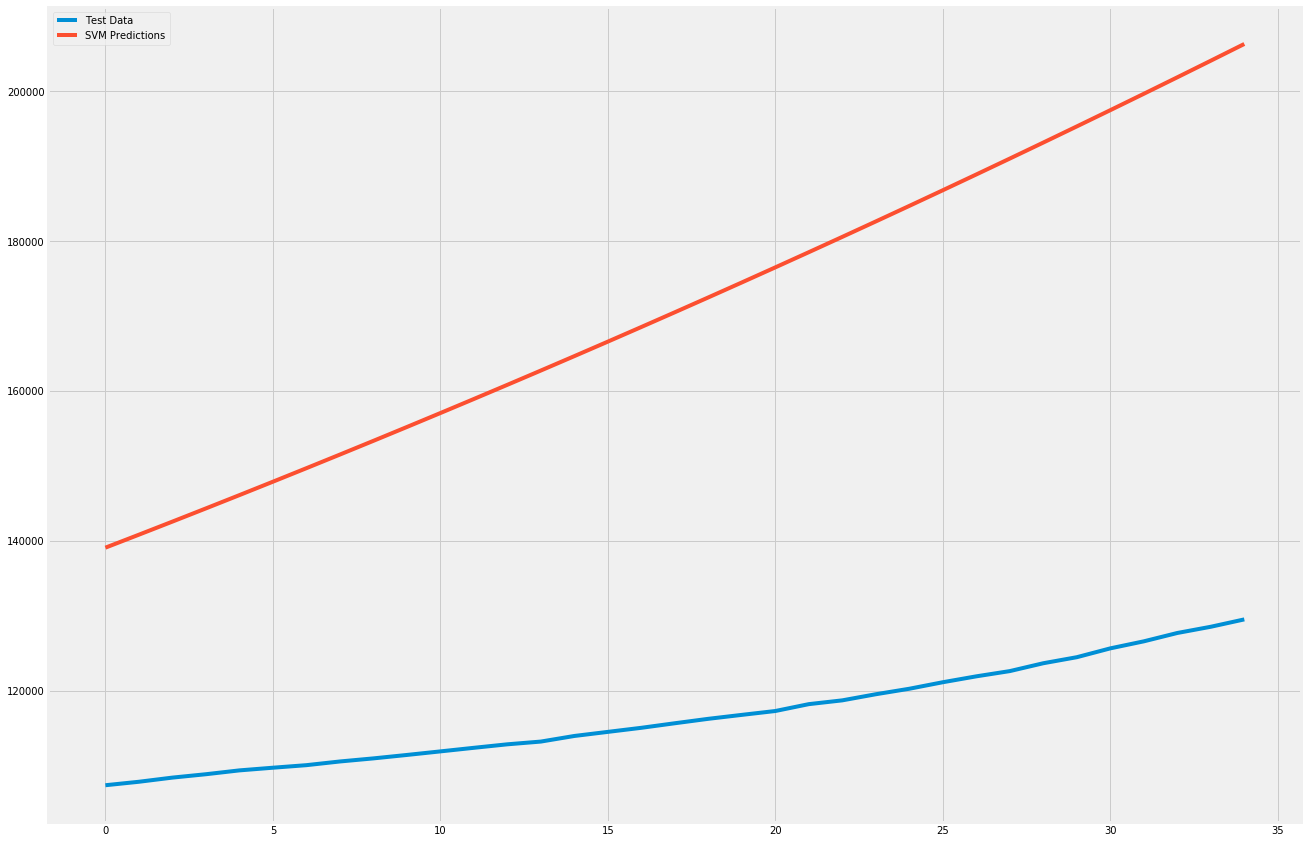

In [154]:
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.figure(figsize=(20,15))
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

#### Mean Absolute percentage error
I prefer to use mean absolute percent error because it gives an simple percentage to communicate that shows how off the predictions are. MAPE is not included in Sklearn, so a custom feature must be used.

In [155]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [156]:
mean_absolute_percentage_error(y_test_confirmed,svm_test_pred)

46.30133082084802

#### Linear Regression model

In [157]:
# transform our data for polynomial regression
poly = PolynomialFeatures(degree=5)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)

In [158]:
# polynomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))


MAE: 2684.2462204564827
MSE: 8517798.559291996


#### Mean Absolute percentage error


In [159]:
mean_absolute_percentage_error(y_test_confirmed,test_linear_pred)

2.258701933613843

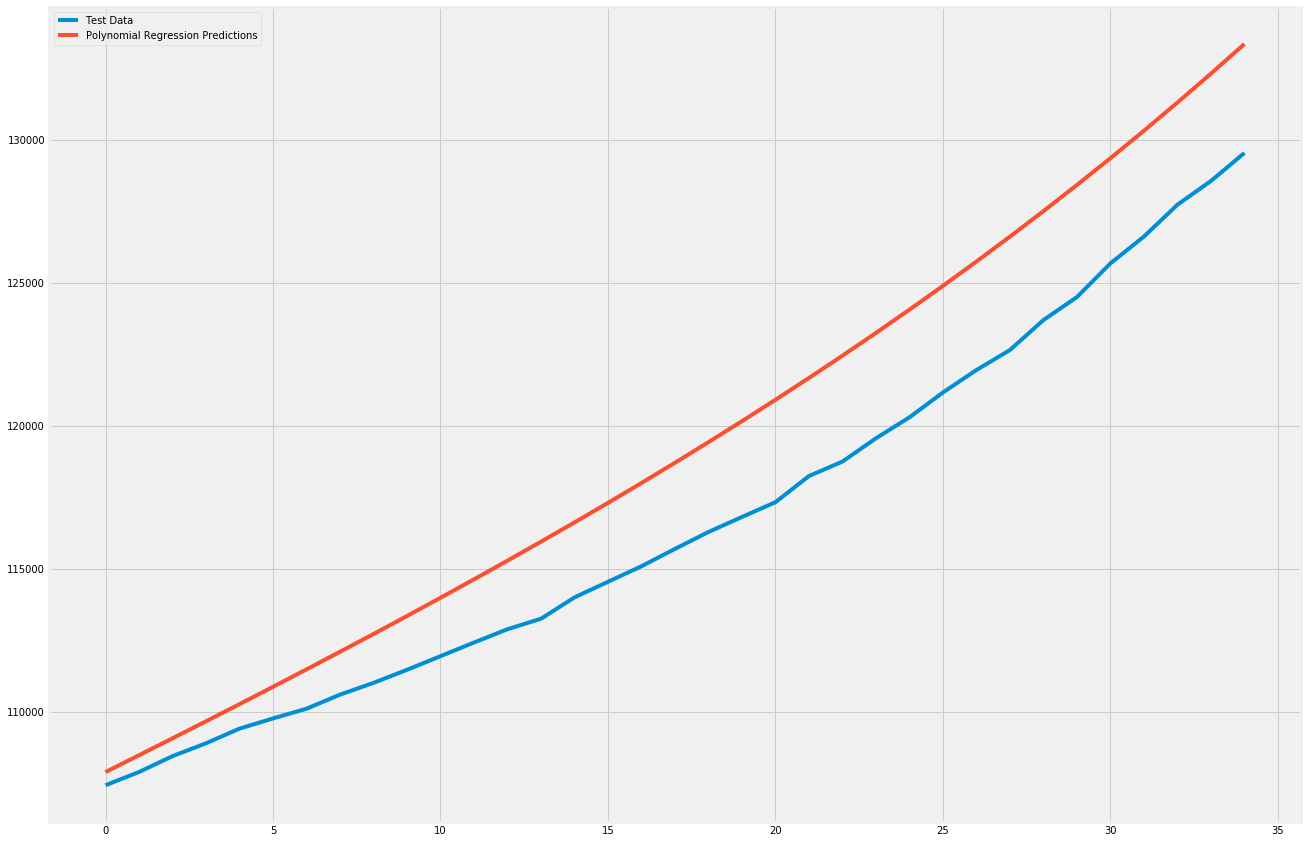

In [160]:
plt.figure(figsize=(20,15))
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

In [161]:
# confirmed_df.head()

In [162]:
# Transposing the row for time series analysis

confirmed_df = confirmed_df.T
confirmed_df = confirmed_df.rename(columns=confirmed_df.iloc[1])
# confirmed_df

In [163]:
confirmed_df = confirmed_df[4:]
# confirmed_df

In [164]:
confirmed_df['Total_cases'] = confirmed_df.sum(axis=1)

In [165]:
# converting the index column to date

confirmed_df.reset_index(level=0,inplace=True)
# confirmed_df

In [166]:
confirmed_df['dates'] = pd.to_datetime(confirmed_df['index'])
# confirmed_df.info()

In [167]:
time_series_analysis_df = confirmed_df[['Total_cases','dates']]
# time_series_analysis_df

In [168]:
# Now we will set the dates column as the index of the dataframe to allow us really explore the our data.

time_series_analysis_df = time_series_analysis_df.set_index('dates')
time_series_analysis_df

Total_cases
dates                  
2020-01-22        555.0
2020-01-23        654.0
2020-01-24        941.0
2020-01-25       1434.0
2020-01-26       2118.0
...                 ...
2020-10-21   41227176.0
2020-10-22   41695834.0
2020-10-23   42202573.0
2020-10-24   42613453.0
2020-10-25   42990712.0

[278 rows x 1 columns]

#### XGBoost

In [169]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree
plt.style.use('fivethirtyeight')

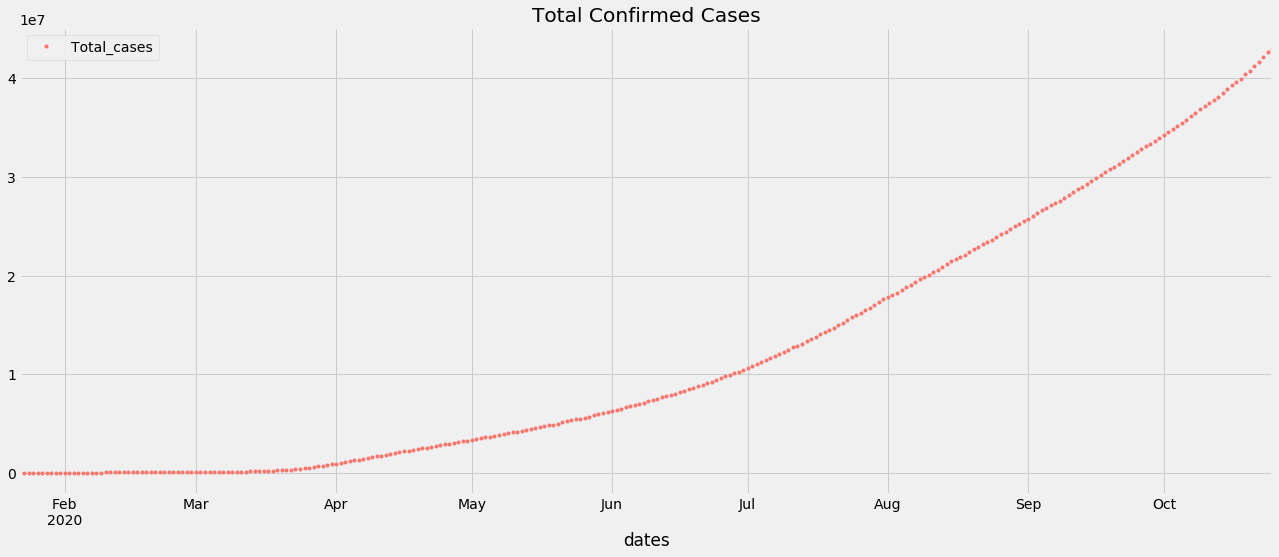

In [170]:
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]

_ = time_series_analysis_df.plot(style='.', figsize=(20,8), color=color_pal[0], title='Total Confirmed Cases')

#### Train/Test Split

In [171]:
split_date = '2020-09-01'                #Splitting the data after August month to be used by our validation set.

covid_train = time_series_analysis_df.loc[time_series_analysis_df.index  <= split_date].copy()
covid_test = time_series_analysis_df.loc[time_series_analysis_df.index  > split_date].copy()

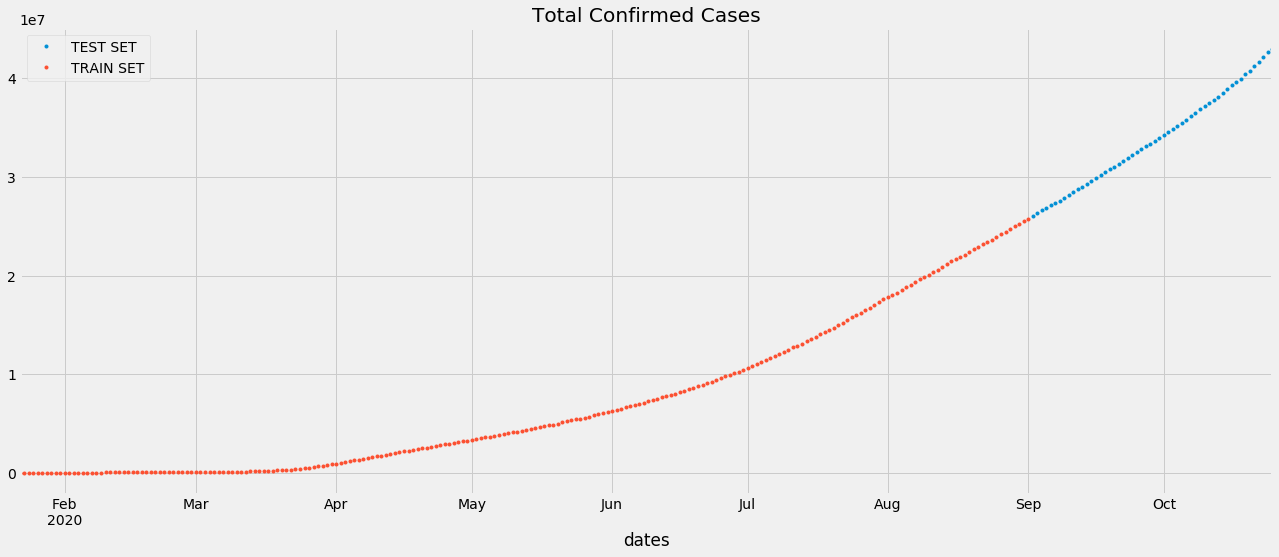

In [172]:
_ = covid_test.rename(columns={'Total_cases':'TEST SET'})\
    .join(covid_train.rename(columns={'Total_cases':'TRAIN SET'}), how= 'outer')\
    .plot(figsize=(20,8), title='Total Confirmed Cases', style='.')

#### Create time series features

In [173]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

#### Creating Train test data

In [174]:
X_train, y_train = create_features(covid_train, label='Total_cases')
X_test, y_test = create_features(covid_test, label='Total_cases')

#### Create XGBoost Model

In [175]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=1)

[0]	validation_0-rmse:7460965.50000	validation_1-rmse:28015856.00000
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:5343181.50000	validation_1-rmse:23392208.00000
[2]	validation_0-rmse:3832335.25000	validation_1-rmse:19951494.00000
[3]	validation_0-rmse:2754477.75000	validation_1-rmse:17383826.00000
[4]	validation_0-rmse:1986035.37500	validation_1-rmse:15484589.00000
[5]	validation_0-rmse:1438227.00000	validation_1-rmse:14083320.00000
[6]	validation_0-rmse:1048114.62500	validation_1-rmse:13144426.00000
[7]	validation_0-rmse:768961.93750	validation_1-rmse:12331989.00000
[8]	validation_0-rmse:570343.56250	validation_1-rmse:11719905.00000
[9]	validation_0-rmse:430251.34375	validation_1-rmse:11291193.00000
[10]	validation_0-rmse:328621.50000	validation_1-rmse:10933611.00000
[11]	validation_0-rmse:256926.43750	validation_1-rmse:10651115.00000
[12]	validation_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

#### Feature Importance

The value of features is a perfect way to get a general understanding of which features the model depends most on to make the forecast. This is a metric that essentially summarises the number of times each function is split.

We can see that the most widely used day of the year was to separate trees, while the next hour and year came. Due to the fact that it could be generated by various day-of-year splits, Quarter has low significance.

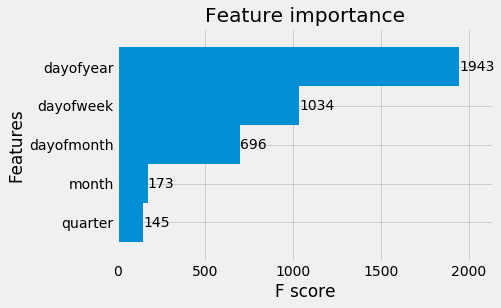

In [176]:
feature_importance = plot_importance(reg, height=1)

#### Forecast (Test Set)

In [177]:
covid_test['Cases_Prediction'] = reg.predict(X_test)
covid_all = pd.concat([covid_test, covid_train], sort=False)

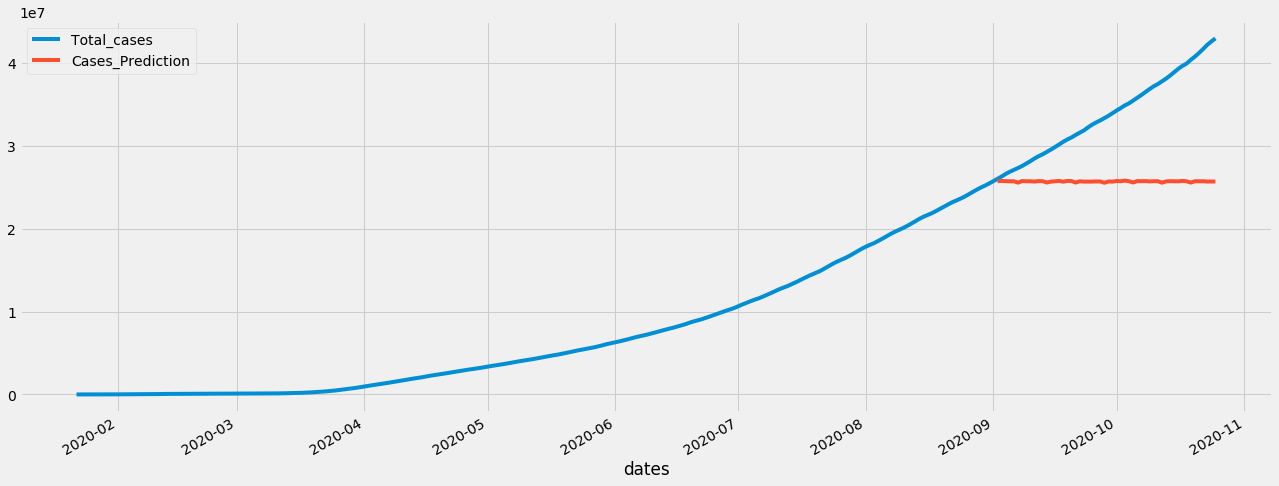

In [178]:
predictions = covid_all[['Total_cases','Cases_Prediction']].plot(figsize=(20,8))

#### Plotting the forecast with actuals

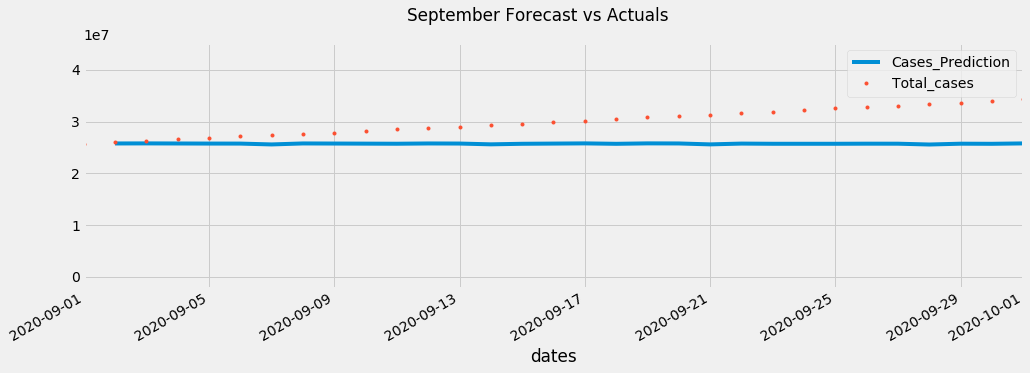

In [179]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = covid_all[['Cases_Prediction','Total_cases']].plot(ax=ax,style=['-','.'])
ax.set_xbound(lower='2020-09-01', upper='2020-10-01')

plot = plt.suptitle('September Forecast vs Actuals')

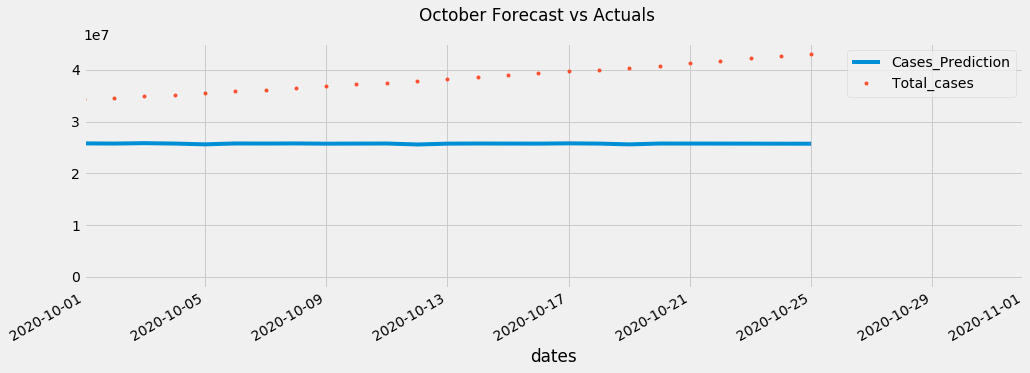

In [180]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = covid_all[['Cases_Prediction','Total_cases']].plot(ax=ax,style=['-','.'])
ax.set_xbound(lower='2020-10-01', upper='2020-11-01')

plot = plt.suptitle('October Forecast vs Actuals')

In [181]:
mean_squared_error(covid_test['Total_cases'],
                  covid_test['Cases_Prediction'])

89625139120288.56

In [182]:
mean_absolute_error(covid_test['Total_cases'],
                  covid_test['Cases_Prediction'])

8111540.259259259

#### Mean Absolute percentage error


In [183]:
mean_absolute_percentage_error(covid_test['Total_cases'],
                  covid_test['Cases_Prediction'])

22.374532570000106

#### Additive model 
 1. This model is used when the time series level does not vary with the variations around the trend. Here, the time series components are simply added together using the formula:
     - y(t) = Level(t) + Trend(t) + Seasonality(t) + Noise(t)

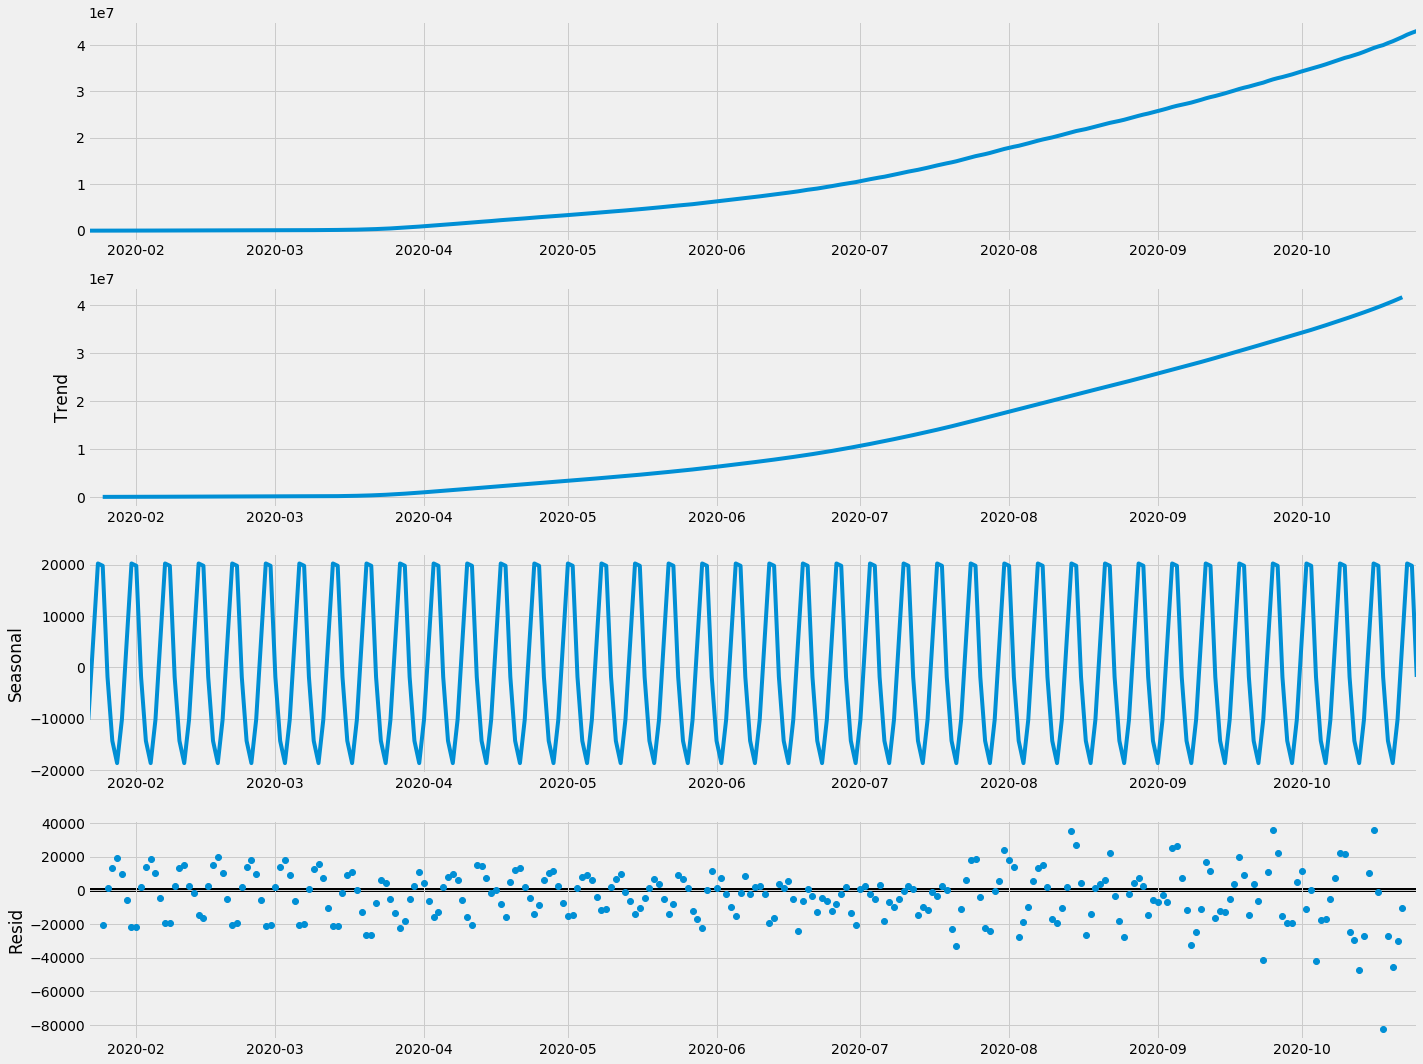

In [195]:
import matplotlib
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(time_series_analysis_df,model='additive')
fir = decomposition.plot()
matplotlib.rcParams['figure.figsize']=[20.0,15.0]

 -  Here we can see that trend is continously going up, **Total number of cases grew from 10 million in month of july to 40 million in the month of october.**
 - The increase in the number of the cases can be attributed to some of the severly affected country mentioned above in the discussion.
 - The sesonality shows us a sinusoidal trend which can be attributed to continous increasing trend in the number of confirmed cases.
 - we can see some noise components in later months of **august, september, and october** which can be attributed to poorly affected countries above mentioned.

#### Time Series Forecasting with Arima (Autoregressive Integrated Moving Average)

With the notation ARIMA(p, d, q), ARIMA models are denoted. The seasonality, pattern, and noise in the data account for these three parameters

In [185]:
import itertools

In [186]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


#### Parameter Selection

In [187]:
# Use this for parameter selection

# for param in pdq:
#     for param_seasonal in seasonal_pdq:
#         try:
#             mod = sm.tsa.statespace.SARIMAX(time_series_analysis_df,
#                                             order=param,
#                                             seasonal_order=param_seasonal,
#                                             enforce_stationarity=False,
#                                             enforce_invertibility=False)
#             results = mod.fit()
#             print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
#         except:
#             continue

The above output suggests that SARIMAX(1, 1, 1)x(1, 1, 1, 12) yields the lowest AIC value.

#### Fitting the model

In [188]:
mod = sm.tsa.statespace.SARIMAX(time_series_analysis_df,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0081      0.004    239.991      0.000       1.000       1.016
ma.L1         -0.2855      0.075     -3.800      0.000      -0.433      -0.138
ar.S.L12      -0.1942      0.116     -1.677      0.094      -0.421       0.033
ma.S.L12      -1.0672      0.048    -22.314      0.000      -1.161      -0.973
sigma2      9.988e+08   2.33e-11   4.28e+19      0.000    9.99e+08    9.99e+08


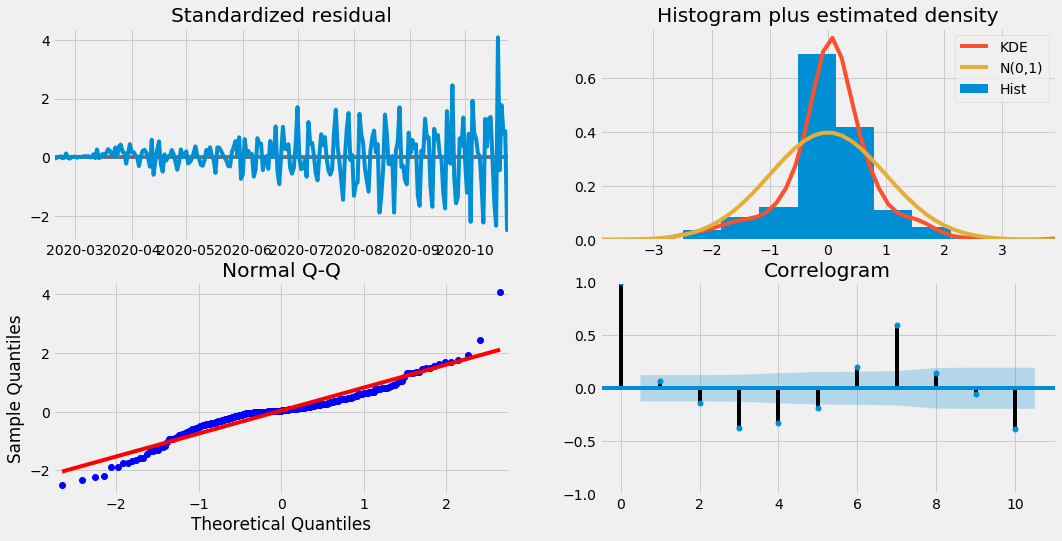

In [189]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

#### Validation of forecasts

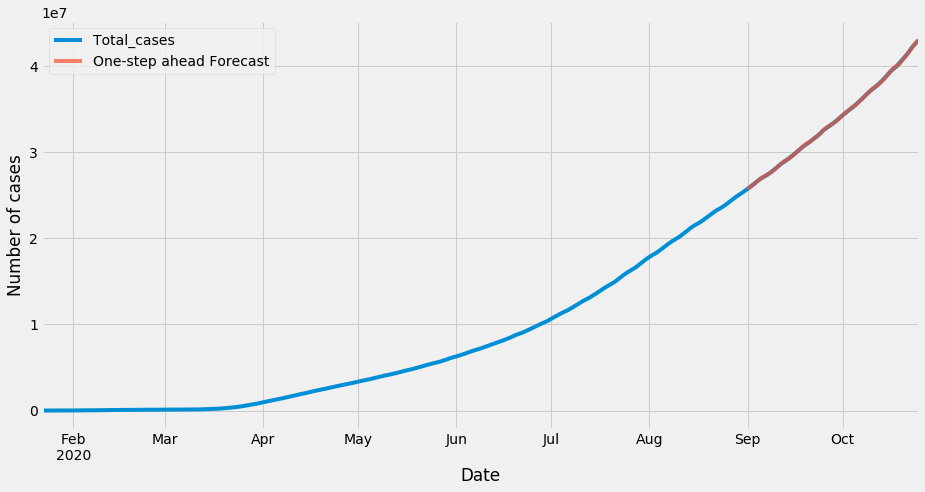

In [190]:
pred = results.get_prediction(start=pd.to_datetime('2020-09-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = time_series_analysis_df.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Number of cases')
plt.legend()
plt.show()

In [191]:
y_forecasted = pred.predicted_mean
# print(y_forecasted)
# time_series_analysis_df['Total_cases']['2020-09-01':]
y_truth = time_series_analysis_df['Total_cases']['2020-09-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1801495562.53


In [192]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 42444.03


#### Mean Absolute percentage error

In [193]:
mean_absolute_percentage_error(y_truth,y_forecasted)

0.09821524059441171

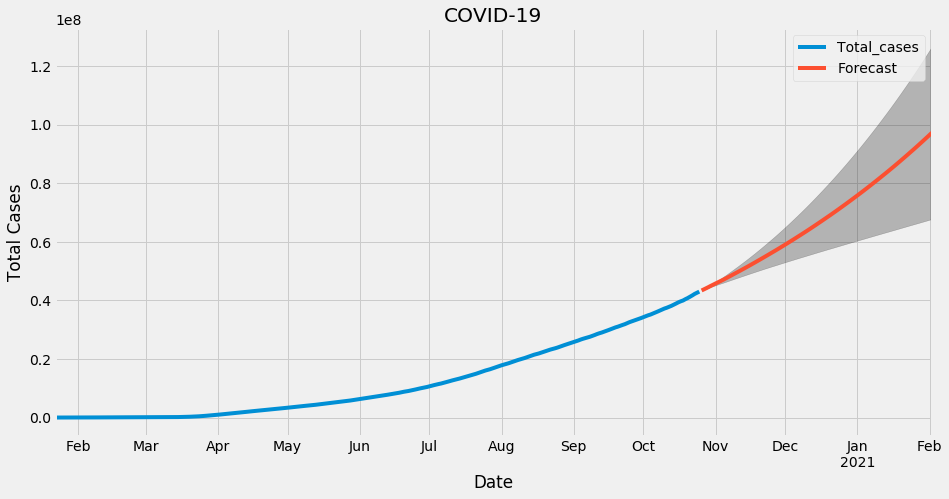

In [196]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = time_series_analysis_df['Total_cases'].plot(label='Total_cases', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_title('COVID-19')
ax.set_xlabel('Date')
ax.set_ylabel('Total Cases')
plt.legend()
plt.show()

 - **Future Forecasting**
 - We used Arima model from stats to predict future values as mean absolute percentage error of ARIMA model is very low **~0.098%**
 - Our model predicts that in the month of **Jan2021** we will have around [60million, 90million] cases.
 - As we move further in the future the confidence interval of prediction drops because this model doesn't take into account various policies that have been implemented by countries to curb the spread the of the virus. 